# Handwritten Digits Detection

* Importing the Libraries


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Importing the Dataset

In [3]:
data=keras.datasets.mnist

* Splitting the Data


In [6]:
(x_train,y_train),(x_test,y_test)=data.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[27][27]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

* Visualising the image points

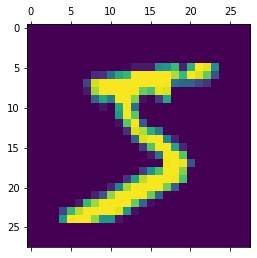

In [20]:
plt.matshow(x_train[0])

In [12]:
x_test.shape

(10000, 28, 28)

In [22]:
y_train[0]

5

* Flattening the x_train & x_test

In [23]:
flat_x_train=x_train.reshape(len(x_train),28*28)
flat_x_test=x_test.reshape(len(x_test),28*28)

In [24]:
flat_x_train.shape

(60000, 784)

* Modle selection & Training

In [26]:
model=keras.Sequential([
    keras.layers.Dense(
        units=10,
        input_shape=(784,)
        ,activation='sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(flat_x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6502 - accuracy: 0.8395
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.9528 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.6629 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.4703 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.4107 - accuracy: 0.8871


* Evaluating the results


In [27]:
model.evaluate(flat_x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 5.6419 - accuracy: 0.8955


[5.641941070556641, 0.8955000042915344]

* Predicting the values

In [28]:
y_pred=model.predict(flat_x_test)

313/313 [==============================] - 0s 1ms/step


In [29]:
y_pred[0]

array([0.000000e+00, 0.000000e+00, 9.515413e-18, 1.000000e+00,
       0.000000e+00, 9.098704e-11, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00], dtype=float32)

In [30]:
np.argmax(y_pred[0])

3

* Storing the max z value in the variable

In [31]:
y_pred_lable=[np.argmax(i) for i in y_pred]

* Confusion matrix

In [32]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lable)

* Plotting the predictions

Text(69.0, 0.5, 'Predicted values')

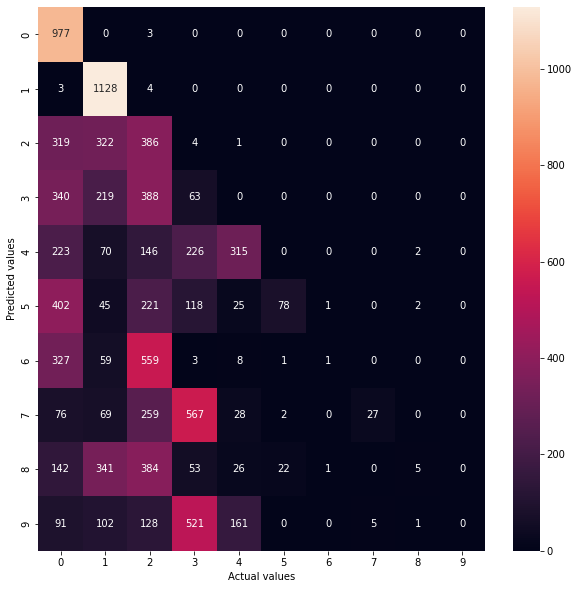

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Actual values')
plt.ylabel("Predicted values")